In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [15]:
def make_system(elk_0 ,wolves_0, α, β, δ, γ):
    """Make a system object for the Lotka-Volterra model.
    
    α: Elk birth rate
    β: Elk death rate
    δ: Wolf birth rate
    γ: Wolf death rate
    
    returns: System object
    """
    init = State(x=elk_0, y=wolves_0)

    t0 = 0
    t_end = 2000

    return System(init=init, t0=t0, t_end=t_end,
                  α=α, β=β, δ=δ, γ=γ)

In [3]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (x, y)
    t: time
    system: System object
    
    returns: State (x,y)
    """
    x, y = state

    elk_births = system.α * x
    elk_deaths = system.β * x * y
    wolf_births = system.δ * x * y
    wolf_deaths = system.γ * y
    
    x += elk_births - elk_deaths
    y += wolf_births - wolf_deaths
    
    return State(x=x, y=y)

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

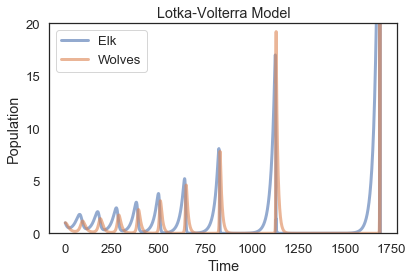

In [19]:
system = make_system(1, 1, 0.05, 0.1, 0.1, 0.1)
results = run_simulation(system, update_func)
plot(results.x, label = "Elk")
plot(results.y, label = "Wolves")
decorate(ybound = (0,20),
        ylabel = "Population",
        xlabel = "Time",
        title = "Lotka-Volterra Model",
        loc = "upper left")